In [155]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [125]:
df = pd.read_csv("/Users/sameekshachiguru/Desktop/upgrad/case studies/lending case study/loan.csv")
df.head()

/var/folders/r5/4kh3f9md381bvdpvdb5574m40000gn/T/ipykernel_73241/229659999.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/sameekshachiguru/Desktop/upgrad/case studies/lending case study/loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [126]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [127]:
df.shape

(39717, 111)

In [128]:
same_columns = {}
for c in df.columns:
    if df[c].value_counts().shape[0] == 1:
        same_columns[c] = list(df[c].unique())
same_columns

{'pymnt_plan': ['n'],
 'initial_list_status': ['f'],
 'collections_12_mths_ex_med': [0.0, nan],
 'policy_code': [1],
 'application_type': ['INDIVIDUAL'],
 'acc_now_delinq': [0],
 'chargeoff_within_12_mths': [0.0, nan],
 'delinq_amnt': [0],
 'tax_liens': [0.0, nan]}

In [129]:
df = df.drop(same_columns.keys(), axis=1)
df.shape

(39717, 102)

In [130]:
missing = round(100*(df.isnull().sum()/len(df.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
pub_rec_bankruptcies            1.75
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 65, dtype: float64

There are many columns in  data with 100% missing values. removing all the columns with more than 50% missing values.

 Number of columns with 50% above missing values:  57


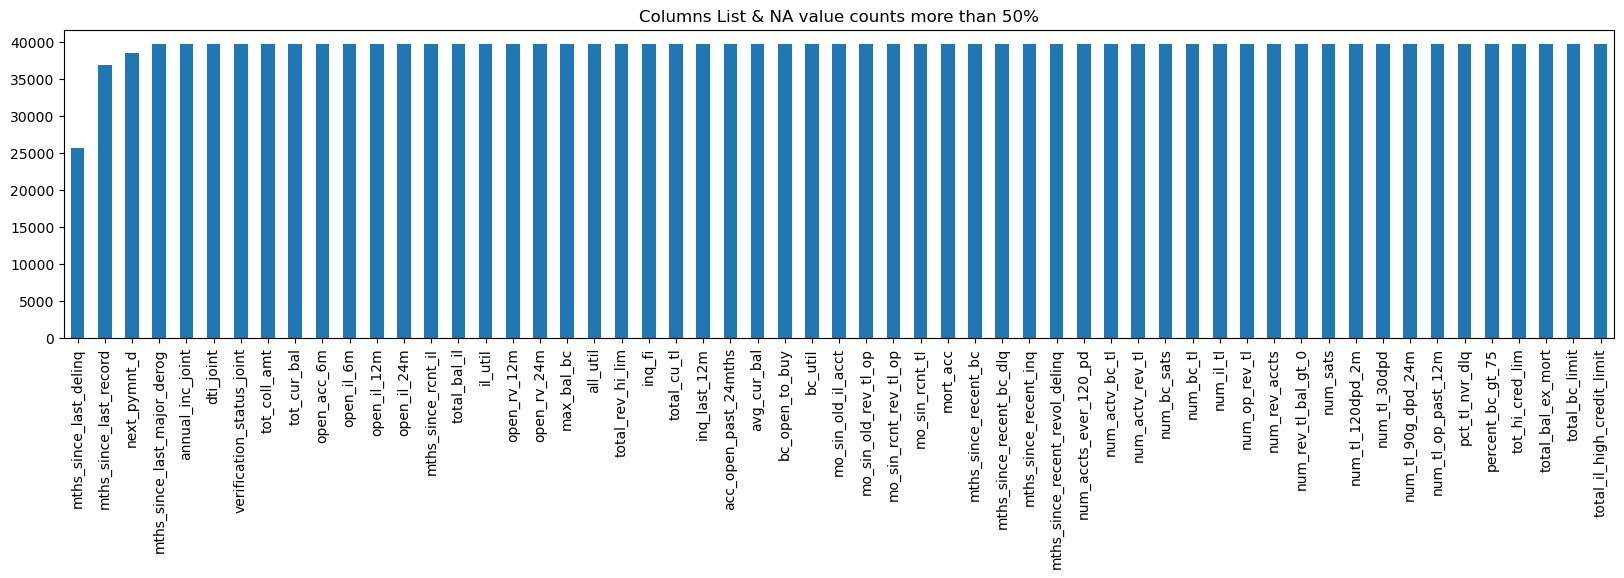

In [131]:
NA_col = df.isnull().sum()
NA_col = NA_col[NA_col.values >(0.5*len(df))]
print(" Number of columns with 50% above missing values: ", len(NA_col))
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('Columns List & NA value counts more than 50%')
plt.show()

In [132]:
df = df.drop(NA_col.keys(), axis=1)
df.shape

(39717, 45)

In [133]:
df[df.columns[df.isnull().any()]].isnull().sum()

emp_title                2459
emp_length               1075
desc                    12940
title                      11
revol_util                 50
last_pymnt_d               71
last_credit_pull_d          2
pub_rec_bankruptcies      697
dtype: int64

In [134]:
for col in df.columns:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
last_credit_pull_d
pub_rec_bankruptcies


Removing columns which are customer behavior oriented as they doesnt help in our analysis

In [135]:
df = df.drop(['recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','id', 'member_id','url', 'desc', 'zip_code','pub_rec_bankruptcies','earliest_cr_line','delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee'], axis = 1)


In [136]:
df.shape

(39717, 19)

In [142]:
for col in df.columns:
    print(col)

loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
purpose
title
addr_state
dti


<AxesSubplot:ylabel='loan_status'>

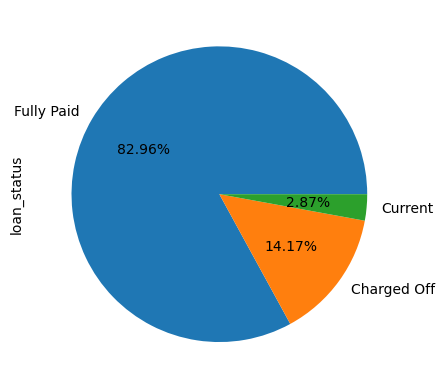

In [122]:
df['loan_status'].value_counts()
df['loan_status'].value_counts().plot(kind='pie', autopct='%1.2f%%') 

In [152]:
df = df[df['loan_status']!= 'Current']

In [ ]:
REPLACING N/A OF EMPLOYMENT LENGTH WITH SELF EMPLOYED

In [140]:
print(df.emp_length.unique())
df.emp_length.fillna('0',inplace=True)

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan]


In [141]:
df.emp_length.replace(['n/a'],'Self Employed',inplace=True)
print(df.emp_length.unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' '0']


In [146]:
df.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
title                          object
addr_state                     object
dti                           float64
dtype: object

In [147]:
#removing % and changing int rate to float
df.int_rate=df.int_rate.astype(str).str.rstrip('%').astype('float')

#converting issue date to date time

In [148]:
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [149]:
df.dtypes


loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
title                          object
addr_state                     object
dti                           float64
dtype: object

In [150]:
df_backup=df.copy()

In [151]:
df_backup.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20


UNIVARIAT ANALYSIS

1.LOAN STATUS- loan status is the target variable

In [153]:
df.groupby(['loan_status']).size().reset_index(name='count')

,loan_status,count
0,Charged Off,5627
1,Fully Paid,32950


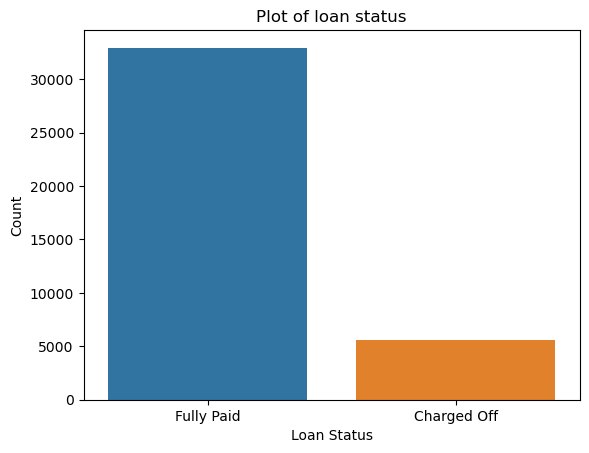

In [156]:
sb.countplot(x= df['loan_status'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Plot of loan status')
plt.show()

In [157]:
df.loan_amnt


0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 38577, dtype: int64

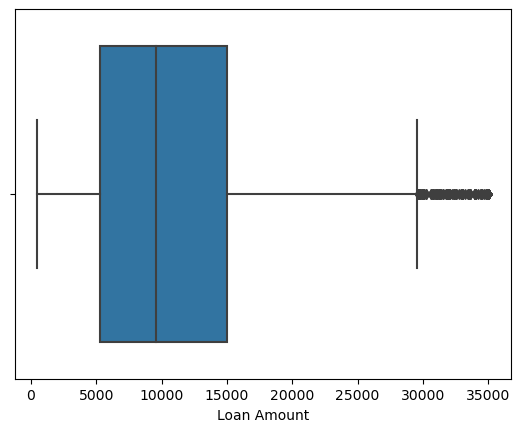

In [158]:
sb.boxplot(x = df['loan_amnt'])
plt.xlabel('Loan Amount')
plt.show()

The box plot shows that loan amount varies from 0 to 35,000 having median of 10,000

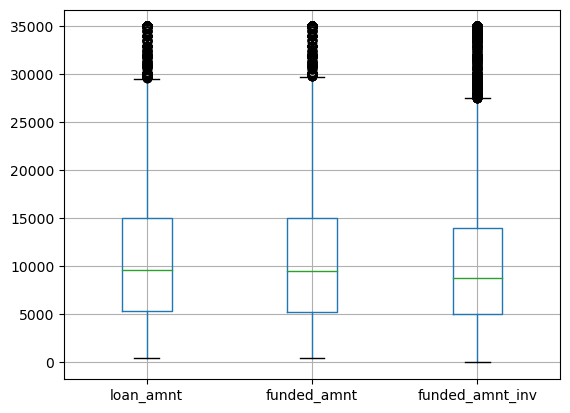

In [159]:
df.boxplot(column=['loan_amnt','funded_amnt','funded_amnt_inv']);
#We need to remove the outliers if any. We will similarly plot boxplots for all numerical values columns

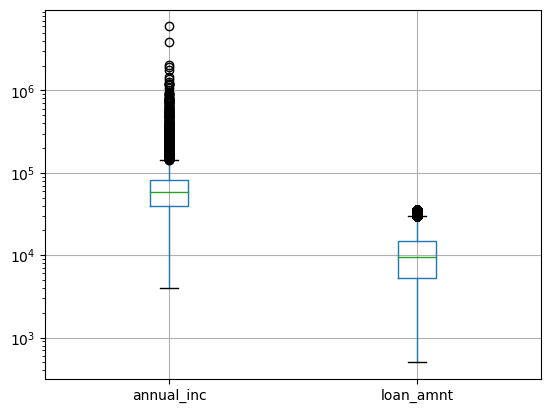

In [163]:
plt.yscale('log')
df.boxplot(column=['annual_inc','loan_amnt']);

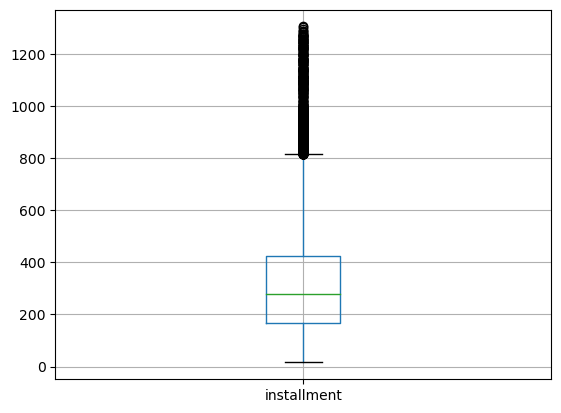

In [164]:
df.boxplot(column=['installment']);

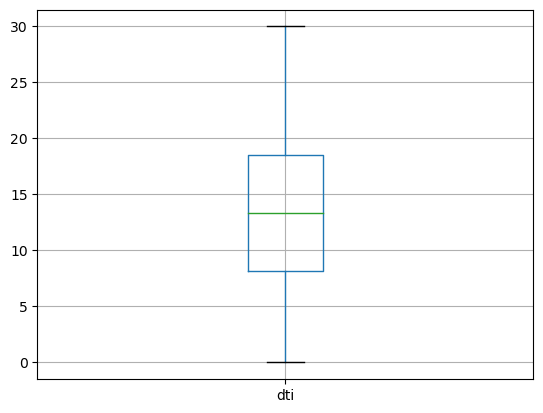

In [166]:
df.boxplot(column=['dti']);
